In [1]:
!pip install WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import random

In [2]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

In [3]:
# Convert labels to binary format
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

<ipython-input-4-3a204dccb433>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette=['green', 'red'])


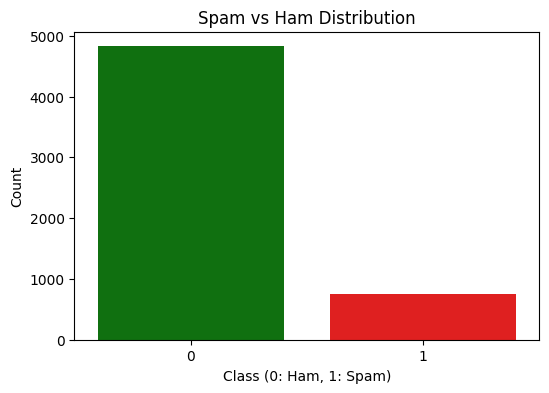

In [4]:
# Visualizing class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['label'], palette=['green', 'red'])
plt.title("Spam vs Ham Distribution")
plt.xlabel("Class (0: Ham, 1: Spam)")
plt.ylabel("Count")
plt.show()

In [19]:
# Word cloud for spam and ham
spam_words = " ".join(df[df['label'] == 1]['message'])
ham_words = " ".join(df[df['label'] == 0]['message'])

(np.float64(-0.5), np.float64(399.5), np.float64(299.5), np.float64(-0.5))

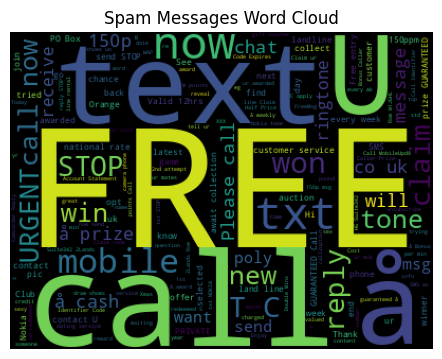

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=400, height=300, background_color='black').generate(spam_words))
plt.title("Spam Messages Word Cloud")
plt.axis("off")

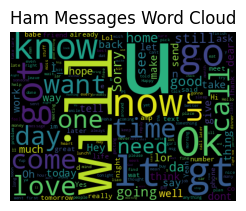

In [8]:
plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=400, height=300, background_color='black').generate(ham_words))
plt.title("Ham Messages Word Cloud")
plt.axis("off")
plt.show()

In [9]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [10]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [11]:
# Train Naïve Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [12]:
# Predictions
y_pred = nb_model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9730941704035875
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



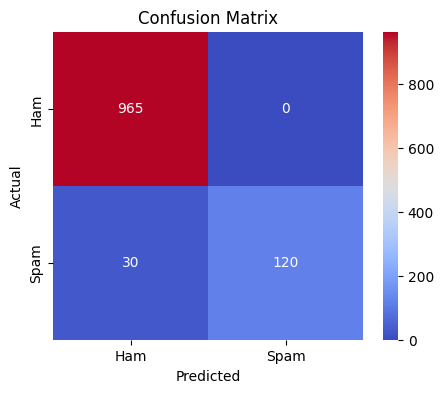

In [13]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
# Testing on Random Samples
random_samples = ["You have won a $1000 lottery! Click here to claim.", "Hey, are we still meeting at 5?"]
random_samples_tfidf = vectorizer.transform(random_samples)
predictions = nb_model.predict(random_samples_tfidf)

for msg, pred in zip(random_samples, predictions):
    print(f"Message: {msg}\nPredicted as: {'Spam' if pred == 1 else 'Ham'}\n")

Message: You have won a $1000 lottery! Click here to claim.
Predicted as: Spam

Message: Hey, are we still meeting at 5?
Predicted as: Ham

